In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd

# pietro
#data_weather_osm = pd.read_csv("/content/drive/My Drive/UnimiB/Magistrale/Secondo Anno/Advanced Machine Learning/Progetto AML/data_weather_osm.csv")
# carlo
#data_weather_osm = pd.read_csv("/content/drive/My Drive/universita/magistrale/advanced_machine_learning/Progetto AML/data_weather_osm.csv")
# marco
data_weather_osm = pd.read_csv("/content/drive/My Drive/Progetto AML/data_weather_osm.csv")

data_weather_osm = data_weather_osm.drop(columns=['date', 'id', 'pickup_datetime', 'dropoff_datetime', 'starting_street', 'end_street', 'street_for_each_step', 'distance_per_step', 'travel_time_per_step', 'step_maneuvers', 'step_direction', 'step_location_list'])

data_weather_osm.shape

(1458643, 26)

#Preprocessing

###Eliminazione outlier coordinate

In [0]:
import numpy as np
# pickup media e std
mean_pickup_longitude = np.mean(data_weather_osm.pickup_longitude, axis=0)
std_pickup_longitude = np.std(data_weather_osm.pickup_longitude, axis=0)

mean_pickup_latitude = np.mean(data_weather_osm.pickup_latitude, axis=0)
std_pickup_latitude = np.std(data_weather_osm.pickup_latitude, axis=0)

# dropoff media e std
mean_dropoff_longitude = np.mean(data_weather_osm.dropoff_longitude, axis=0)
std_dropoff_longitude = np.std(data_weather_osm.dropoff_longitude, axis=0)

mean_dropoff_latitude = np.mean(data_weather_osm.dropoff_latitude, axis=0)
std_dropoff_latitude = np.std(data_weather_osm.dropoff_latitude, axis=0)


In [0]:
#dati che eliminiamo rispetto a pickup

multiplier = 5

data_delete_1 = data_weather_osm[data_weather_osm.pickup_longitude < mean_pickup_longitude - multiplier * std_pickup_longitude]
data_delete_2 = data_weather_osm[data_weather_osm.pickup_longitude > mean_pickup_longitude + multiplier * std_pickup_longitude]

data_delete_3 = data_weather_osm[data_weather_osm.pickup_latitude < mean_pickup_latitude - multiplier * std_pickup_latitude]
data_delete_4 = data_weather_osm[data_weather_osm.pickup_latitude > mean_pickup_latitude + multiplier * std_pickup_latitude]

data_delete = pd.concat([data_delete_1, data_delete_2, data_delete_3, data_delete_4])

data_delete = data_delete.drop_duplicates()
data_delete.shape

(315, 26)

In [0]:
import folium
m = folium.Map(location=[40.767936706543, -73.9821548461914])
number_point = 1400
for i in range(0, data_delete.shape[0]): 
  folium.CircleMarker([data_delete.iloc[i].pickup_latitude, data_delete.iloc[i].pickup_longitude], radius=1).add_to(m)
m

In [0]:
#dati che eliminiamo rispetto a dropoff

#(soglia)
multiplier = 5

data_delete_5 = data_weather_osm[data_weather_osm.dropoff_longitude < mean_dropoff_longitude - multiplier * std_dropoff_longitude]
data_delete_6 = data_weather_osm[data_weather_osm.dropoff_longitude > mean_dropoff_longitude + multiplier * std_dropoff_longitude]

data_delete_7 = data_weather_osm[data_weather_osm.dropoff_latitude < mean_dropoff_latitude - multiplier * std_dropoff_latitude]
data_delete_8 = data_weather_osm[data_weather_osm.dropoff_latitude > mean_dropoff_latitude + multiplier * std_dropoff_latitude]

data_delete = pd.concat([data_delete_5, data_delete_6, data_delete_7, data_delete_8])

data_delete = data_delete.drop_duplicates()
data_delete.shape

(973, 26)

In [0]:
import folium
m = folium.Map(location=[40.767936706543, -73.9821548461914])
for i in range(0, data_delete.shape[0]): 
  folium.CircleMarker([data_delete.iloc[i].dropoff_latitude, data_delete.iloc[i].dropoff_longitude], radius=1, color='red').add_to(m)
m

In [0]:
# elimino le tuple outlier in base a pickup_longitude
#(soglia)
multiplier = 5

data_weather_osm = data_weather_osm[data_weather_osm.pickup_longitude > mean_pickup_longitude - multiplier * std_pickup_longitude]
data_weather_osm = data_weather_osm[data_weather_osm.pickup_longitude < mean_pickup_longitude + multiplier * std_pickup_longitude]

data_weather_osm = data_weather_osm[data_weather_osm.pickup_latitude > mean_pickup_latitude - multiplier * std_pickup_latitude]
data_weather_osm = data_weather_osm[data_weather_osm.pickup_latitude < mean_pickup_latitude + multiplier * std_pickup_latitude]

# elimino le tuple outlier in base a dropoff_longitude
data_weather_osm = data_weather_osm[data_weather_osm.dropoff_longitude > mean_dropoff_longitude - multiplier * std_dropoff_longitude]
data_weather_osm = data_weather_osm[data_weather_osm.dropoff_longitude < mean_dropoff_longitude + multiplier * std_dropoff_longitude]

data_weather_osm = data_weather_osm[data_weather_osm.dropoff_latitude > mean_dropoff_latitude - multiplier * std_dropoff_latitude]
data_weather_osm = data_weather_osm[data_weather_osm.dropoff_latitude < mean_dropoff_latitude + multiplier * std_dropoff_latitude]

# con -2*std elimino 103.835
# con -3*std elimino 48.725
# con -4*str elimino 3.720
data_weather_osm.shape

(1457608, 26)

###Eliminazione outlier

In [0]:
data_weather_osm[data_weather_osm.trip_duration >= 36000].shape[0]

2010

In [0]:
# elimino i viaggi più di lunghi di 5 ore? o li togliamo di più
data_weather_osm = data_weather_osm[data_weather_osm.trip_duration < 18000]

In [0]:
# elimino i viaggi con 0 persone sono 60
data_weather_osm = data_weather_osm[data_weather_osm.passenger_count != 0]

In [0]:
# check if there are trips with duration less than 30 seconds
data_weather_osm[data_weather_osm.trip_duration <= 30].shape[0]

4764

In [0]:
data_weather_osm = data_weather_osm[data_weather_osm.trip_duration > 30]

In [0]:
data_weather_osm.shape

(1450717, 26)

In [0]:
data_weather_osm.head()

,total_distance,total_travel_time,number_of_steps,maximum_temperature,minimum_temperature,average_temperature,precipitation,snow_fall,snow_depth,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,JFK_start,JFK_end,guardia_start,guardia_end,pickup_hour,dropoff_hour,pickup_minute,dropoff_minute,day_week
0,2009.1,164.9,5.0,10.555556,4.444444,7.500000,0.7366,0.0,0.00,2,1,-73.982155,40.767937,-73.964630,40.765602,N,455,False,False,False,False,17,17,24,32,0
1,2513.2,332.0,6.0,7.777778,2.777778,5.277778,0.8890,0.0,0.00,1,1,-73.980415,40.738564,-73.999481,40.731152,N,663,False,False,False,False,0,0,43,54,6
2,1779.4,235.8,4.0,28.333333,18.888889,23.611111,1.0160,0.0,0.00,2,1,-74.010040,40.719971,-74.012268,40.706718,N,429,False,False,False,False,19,19,32,39,2
3,1614.9,140.1,5.0,12.777778,3.333333,8.055556,0.0000,0.0,0.00,2,1,-73.973053,40.793209,-73.972923,40.782520,N,435,False,False,False,False,13,13,30,38,5
4,1393.5,189.4,5.0,3.888889,-2.222222,0.833333,0.0000,0.0,15.24,2,6,-73.982857,40.742195,-73.992081,40.749184,N,443,False,False,False,False,22,22,1,9,5


###Preparazione per keras

In [0]:
data_weather_osm.loc[data_weather_osm.store_and_fwd_flag == 'N', 'store_and_fwd_flag'] = '0'
data_weather_osm.loc[data_weather_osm.store_and_fwd_flag == 'Y', 'store_and_fwd_flag'] = '1'


In [0]:
# si può provare ad eliminare le coordinate gps
data_weather_osm= data_weather_osm.drop(columns=['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude'])

In [0]:
data_weather_osm.head()

,total_distance,total_travel_time,number_of_steps,maximum_temperature,minimum_temperature,average_temperature,precipitation,snow_fall,snow_depth,vendor_id,passenger_count,store_and_fwd_flag,trip_duration,JFK_start,JFK_end,guardia_start,guardia_end,pickup_hour,dropoff_hour,pickup_minute,dropoff_minute,day_week
0,2009.1,164.9,5.0,10.555556,4.444444,7.500000,0.7366,0.0,0.00,2,1,0,455,False,False,False,False,17,17,24,32,0
1,2513.2,332.0,6.0,7.777778,2.777778,5.277778,0.8890,0.0,0.00,1,1,0,663,False,False,False,False,0,0,43,54,6
2,1779.4,235.8,4.0,28.333333,18.888889,23.611111,1.0160,0.0,0.00,2,1,0,429,False,False,False,False,19,19,32,39,2
3,1614.9,140.1,5.0,12.777778,3.333333,8.055556,0.0000,0.0,0.00,2,1,0,435,False,False,False,False,13,13,30,38,5
4,1393.5,189.4,5.0,3.888889,-2.222222,0.833333,0.0000,0.0,15.24,2,6,0,443,False,False,False,False,22,22,1,9,5


###Matrice di correlazione

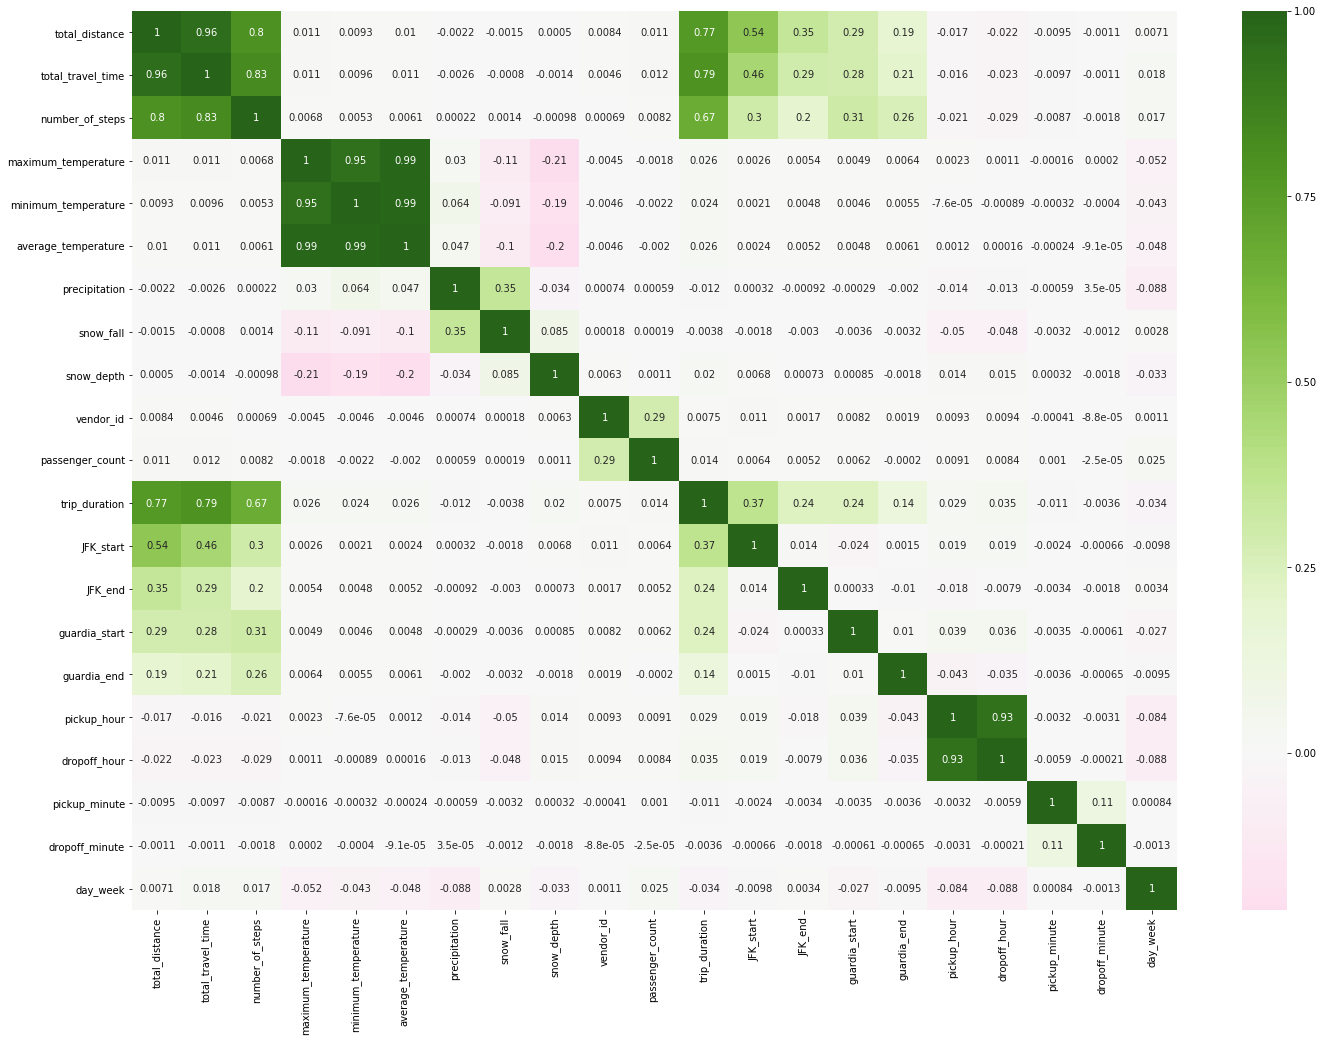

In [0]:
import seaborn as sn
from matplotlib import pyplot
corrMatrix = data_weather_osm.corr()

fig, ax = pyplot.subplots(figsize=(23.4, 16.54))
ax = sn.heatmap(corrMatrix, annot=True, cmap="PiYG", center=0)
pyplot.show()
ax.get_figure().savefig('/content/correlation.png')


#keras

In [0]:
import numpy as np
from sklearn.model_selection import train_test_split

cols = list(data_weather_osm.columns.values)
cols.remove('trip_duration')

target = data_weather_osm.loc[:, 'trip_duration']
features = data_weather_osm.loc[:, cols]

train_features, test_features, train_target, test_target = \
    train_test_split(features, target, test_size=0.20, random_state=0)

train_x, train_y = np.array(train_features), np.array(train_target)
test_x, test_y = np.array(test_features), np.array(test_target)

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
train_scaled_x = scaler.fit_transform(train_x)
test_scaled_x = scaler.transform(test_x)

In [0]:
train_scaled_x

array([[0.02055376, 0.05599186, 0.04545455, ..., 0.98305085, 0.        ,
        1.        ],
       [0.0468787 , 0.0832406 , 0.11363636, ..., 0.98305085, 0.20338983,
        0.5       ],
       [0.06065796, 0.0952275 , 0.13636364, ..., 0.30508475, 0.45762712,
        0.66666667],
       ...,
       [0.04801143, 0.08692887, 0.11363636, ..., 0.57627119, 0.94915254,
        0.16666667],
       [0.03242217, 0.06565769, 0.06818182, ..., 0.76271186, 0.84745763,
        0.        ],
       [0.0374959 , 0.0916664 , 0.04545455, ..., 0.72881356, 0.98305085,
        0.5       ]])

### First model

In [85]:
from keras.models import Sequential
from keras.layers import Dense

#create model
model = Sequential()
num_features = train_scaled_x.shape[1]

print(num_features, 'dims')

#add model layers
model.add(Dense(32, input_dim=num_features, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation = 'relu'))

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse', 'mae', 'mape', 'cosine'])

model.summary()

21 dims
Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_70 (Dense)             (None, 32)                704       
_________________________________________________________________
dense_71 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_72 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_73 (Dense)             (None, 1)                 33        
Total params: 4,929
Trainable params: 4,929
Non-trainable params: 0
_________________________________________________________________


### Second model

In [0]:
# another model
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import PReLU
from keras.layers import Dense, Dropout

num_features = train_scaled_x.shape[1]

model = Sequential()
model.add(Dense(units=100, input_dim=num_features, kernel_initializer='uniform', activation='relu'))
model.add(BatchNormalization())
model.add(PReLU())
model.add(Dropout(0.5))

model.add(Dense(units=40, kernel_initializer='uniform', activation='relu'))
model.add(BatchNormalization())
model.add(PReLU())
model.add(Dropout(0.4))

model.add(Dense(units=20, kernel_initializer='uniform', activation='relu'))
model.add(BatchNormalization())
model.add(PReLU())
model.add(Dropout(0.3))

model.add(Dense(units=1, kernel_initializer='uniform', activation='relu'))
model.compile(loss='mean_squared_error', optimizer='sgd')
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 100)               2200      
_________________________________________________________________
batch_normalization_4 (Batch (None, 100)               400       
_________________________________________________________________
p_re_lu_4 (PReLU)            (None, 100)               100       
_________________________________________________________________
dropout_4 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 40)                4040      
_________________________________________________________________
batch_normalization_5 (Batch (None, 40)                160       
_________________________________________________________________
p_re_lu_5 (PReLU)            (None, 40)               

### After the model definition

In [0]:
history = model.fit(train_scaled_x, np.log(train_y + 1), epochs=10, 
          batch_size=256, verbose=True)

Epoch 1/10
1160573/1160573 [==============================] - 12s 10us/step - loss: 0.3717 - mean_squared_error: 0.3717 - mean_absolute_error: 0.2594 - mean_absolute_percentage_error: 4.1310 - cosine_proximity: -1.0000
Epoch 2/10
1160573/1160573 [==============================] - 10s 9us/step - loss: 0.0161 - mean_squared_error: 0.0161 - mean_absolute_error: 0.0698 - mean_absolute_percentage_error: 1.1359 - cosine_proximity: -1.0000
Epoch 3/10
1160573/1160573 [==============================] - 10s 9us/step - loss: 0.0126 - mean_squared_error: 0.0126 - mean_absolute_error: 0.0620 - mean_absolute_percentage_error: 1.0098 - cosine_proximity: -1.0000
Epoch 4/10
1160573/1160573 [==============================] - 10s 9us/step - loss: 0.0115 - mean_squared_error: 0.0115 - mean_absolute_error: 0.0594 - mean_absolute_percentage_error: 0.9695 - cosine_proximity: -1.0000
Epoch 5/10
1160573/1160573 [==============================] - 10s 9us/step - loss: 0.0109 - mean_squared_error: 0.0109 - mean_a

In [0]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mean_squared_error,mean_absolute_error,mean_absolute_percentage_error,cosine_proximity,epoch
0,0.356167,0.356167,0.359100,5.707268,-0.999455,0
1,0.049910,0.049910,0.152328,2.428245,-1.000000,1
2,0.026654,0.026654,0.105142,1.681825,-1.000000,2
3,0.020896,0.020896,0.089702,1.440926,-1.000000,3
4,0.018272,0.018272,0.082240,1.325279,-1.000000,4


In [0]:
import tensorflow as tf
!pip install git+https://github.com/tensorflow/docs
print(tf.__version__)
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)
plotter.plot({'Basic': history}, metric = "mean_absolute_error")
plt.ylim([0, 10])
plt.ylabel('MAE [MPG]')

  Cloning https://github.com/tensorflow/docs to /tmp/pip-req-build-skr36ajo
  Running command git clone -q https://github.com/tensorflow/docs /tmp/pip-req-build-skr36ajo
  Created wheel for tensorflow-docs: filename=tensorflow_docs-0.0.0-cp36-none-any.whl size=75702 sha256=91d6846ca8df8bd36326d5efdd4f0e29c7ceacaad6637d84195541f28559c9c3
  Stored in directory: /tmp/pip-ephem-wheel-cache-3i8dtj2j/wheels/eb/1b/35/fce87697be00d2fc63e0b4b395b0d9c7e391a10e98d9a0d97f
Successfully built tensorflow-docs
1.15.0


KeyError: ignored

In [0]:
from matplotlib import pyplot

# plot metrics
pyplot.plot(history.history['mean_squared_error'])
pyplot.plot(history.history['mean_absolute_error'])
pyplot.plot(history.history['mean_absolute_percentage_error'])
pyplot.plot(history.history['cosine_proximity'])
pyplot.show()

KeyError: ignored

In [0]:
pred = model.predict(test_scaled_x)
pred = pred.flatten()
pred = np.exp(pred)+1

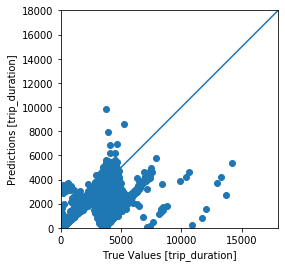

In [83]:
import matplotlib.pyplot as plt

a = plt.axes(aspect='equal')
plt.scatter(test_y, pred)
plt.xlabel('True Values [trip_duration]')
plt.ylabel('Predictions [trip_duration]')
lims = [0, 18000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

In [0]:
diff = pred - test_y
percentDiff = diff/test_y * 100
abspercentDif = np.abs(percentDiff)
mean = np.mean(abspercentDif)
std = np.std(abspercentDif)

In [0]:
print(std)
print(mean)

22.056916141810174
21.96986082334508


In [84]:
from keras import backend as K

prova = np.sqrt(np.mean(np.square(np.log(pred + 1) - np.log(test_y + 1)), axis=-1))
prova

0.10549744725284635

In [0]:
K.mean(K.square(pred - test_y))

<tf.Tensor 'Mean_13:0' shape=() dtype=float64>

In [0]:
df = pd.DataFrame(list(zip(pred, test_y)))
df.head(100)

,0,1
0,831.669373,812
1,925.405823,913
2,1611.004395,1737
3,2272.183594,2176
4,1286.444336,1290
...,...,...
95,328.097992,272
96,918.071655,870
97,851.085571,824
98,1341.000977,1297


In [0]:
df.to_csv("/content/res.csv", index=False)